In [95]:
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt

In [96]:
data=pd.read_csv("covid19.csv")

In [97]:
data

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [98]:
data.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [100]:
data.isna().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [101]:
data1 = data.drop(columns = ['Sno','State/UnionTerritory']).groupby(by = ['Date'],sort = False,as_index = False)
data1 = data1.sum()
data1

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,0,0,0
1,31/01/20,1,0,0,0
2,01/02/20,2,0,0,0
3,02/02/20,3,0,0,0
4,03/02/20,3,0,0,0
5,04/02/20,3,0,0,0
6,05/02/20,3,0,0,0
7,06/02/20,3,0,0,0
8,07/02/20,3,0,0,0
9,08/02/20,3,0,0,0


In [102]:
data1['Total_cases'] = data1.sum(axis = 1)
data1

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3
5,04/02/20,3,0,0,0,3
6,05/02/20,3,0,0,0,3
7,06/02/20,3,0,0,0,3
8,07/02/20,3,0,0,0,3
9,08/02/20,3,0,0,0,3


In [103]:
data.loc[data['Date']=='04/03/20']

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
39,40,04/03/20,Uttar Pradesh,6,0,0,0
40,41,04/03/20,Kerala,3,0,3,0
41,42,04/03/20,Haryana,0,2,0,0
42,43,04/03/20,Delhi,1,0,0,0
43,44,04/03/20,Telengana,1,0,0,0
44,45,04/03/20,Rajasthan,1,14,0,0


Text(0, 0.5, 'Total Cases')

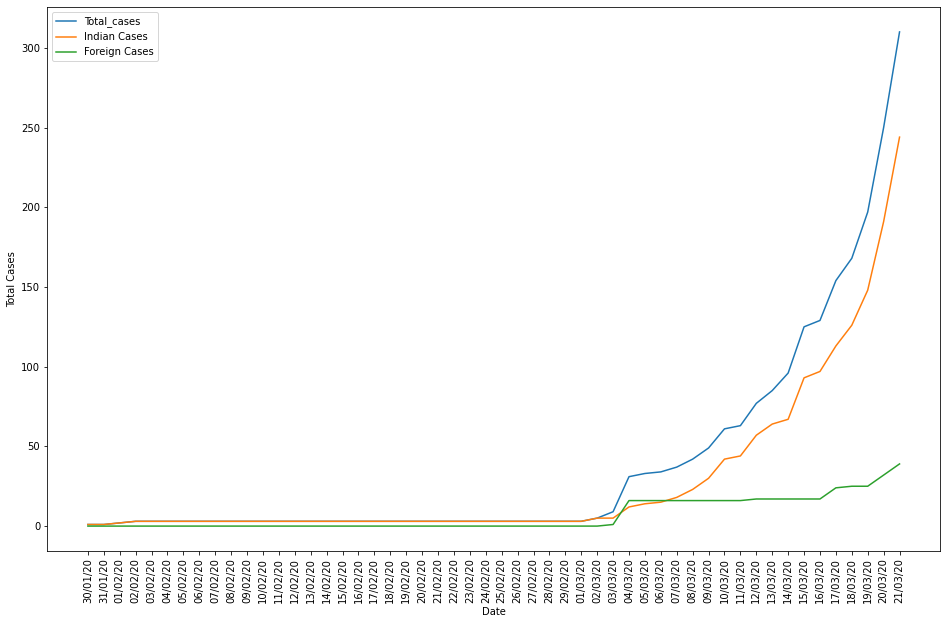

In [105]:
size = (16,10)
fig, ax = plt.subplots(figsize=size)
ax = plt.plot(data1['Date'],data1['Total_cases'], label="Total_cases")
ax = plt.plot(data1['Date'],data1['ConfirmedIndianNational'],label="Indian Cases")
ax = plt.plot(data1['Date'],data1['ConfirmedForeignNational'],label="Foreign Cases")
ax = plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total Cases',fontsize=10)

In [106]:
r = 0  
start = data1.index[data1['Date'] == '30/01/20'][0]
end = data1.index[data1['Date'] == '21/03/20'][0]
for i in range(start,end):
    curr_day_cases = data1.iloc[i]['Total_cases']
    next_day_cases = data1.iloc[i + 1]['Total_cases']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end - start)
print(r)

0.15548289717820452


In [109]:
P_o = 31
t = 26
P_t = P_o * exp(r * t)
P_t

1766.1238891651096

In [110]:
round(P_t,2)

1766.12